In [3]:
%matplotlib inline
import networkx as nx

Name: 
Type: Graph
Number of nodes: 143
Number of edges: 623
Average degree:   8.7133


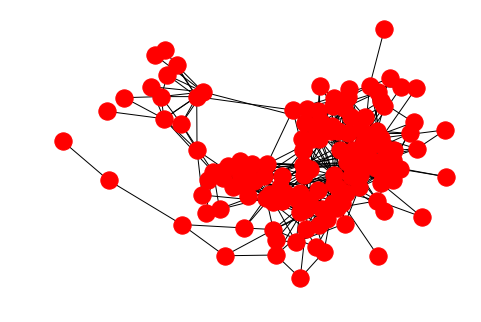

In [4]:

G = nx.read_edgelist('E:/fourth_second_term/social/python gethup course/FirstCourseNetworkScience-master/datasets/ia-enron-only/ia-enron-only.edges', nodetype=int)
#G = nx.read_edgelist('ia-enron-only.edges', nodetype=int)//because read_edgelist assum that nodes type is string
print(nx.info(G))
nx.draw(G,withlabels=True)

In [5]:
print(max(['abc', 'c', 'd']))
print(max(['abc', 'c', 'd'], key=len))

d
abc


In [6]:
print(max(G.nodes))
print(max(G.nodes, key=G.degree))

143
105


In [7]:
betweenness = nx.centrality.betweenness_centrality(G)#return dictionary 
highest_betweenness_node = max(G.nodes, key=betweenness.get)
highest_betweenness_node #the node with highest degree 

105

In [8]:
betweenness[highest_betweenness_node]

0.19400604344556296

In [9]:
max(G.nodes, key=betweenness#key should لاe function so we can't send betweens only so we use get() 

SyntaxError: unexpected EOF while parsing (<ipython-input-9-bb3805aaf4e5>, line 1)

In [ ]:
max(G.nodes, key=betweenness.get)

In [ ]:
import statistics
degree_sequence = [G.degree(n) for n in G.nodes]
print('Mean degree:', statistics.mean(degree_sequence))
print('Median degree:', statistics.median(degree_sequence))

In [ ]:
betweenness = nx.centrality.betweenness_centrality(G)
betweenness_sequence = list(betweenness.values())

print('Mean betweenness:', statistics.mean(betweenness_sequence))
print('Median betweenness:', statistics.median(betweenness_sequence))

In [ ]:
#histograms is depend on the idea of frequency values is how many nodes with this value
from collections import Counter

degree_counts = Counter(degree_sequence)#return dictionary each frequency with number of nodes that with this value as a degree
degree_counts

In [ ]:
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())#min,and max value to identify range

plot_x = list(range(min_degree, max_degree + 1))
plot_x

In [ ]:
plot_y = [degree_counts.get(x, 0) for x in plot_x]#get(x, 0): the default value  is 0 so when count[x] has no value will be 0
plot_y

In [ ]:
import matplotlib.pyplot as plt

plt.bar(plot_x, plot_y)

In [ ]:
counts, bins, patches = plt.hist(betweenness_sequence, bins=10)
bins
counts

In [ ]:
nx.connected_components(G)
core = next(nx.connected_components(G))
core

In [ ]:
import random
#delete random nodes due to some reasons of testing
nodes_to_remove = random.sample(list(C.nodes), 2)#2 is number of nodes that will be removed return nodes that will be removed
C.remove_nodes_from(nodes_to_remove)

In [ ]:
#floor division of 5,2 is
print(5//2)
#regular division
print(5/2)

In [12]:
number_of_steps = 12
M = G.number_of_nodes() # number_of_steps
num_nodes_removed = range(0, G.number_of_nodes(), M)
N = G.number_of_nodes()
C = G.copy()
random_attack_core_proportions = []
for nodes_removed in num_nodes_removed:
    # Measure the relative size of the network core
    core = next(nx.connected_components(C))
    core_proportion = len(core) / N
    random_attack_core_proportions.append(core_proportion)
    
    # If there are more than M nodes, select M nodes at random and remove them
    if C.number_of_nodes() > M:
        nodes_to_remove = random.sample(list(C.nodes), M)
        C.remove_nodes_from(nodes_to_remove)
     

Mean degree: 8.713286713286713
Median degree: 8


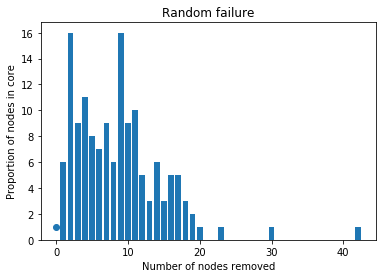

In [17]:
import statistics
from collections import Counter
import matplotlib.pyplot as plt

degree_sequence = [G.degree(n) for n in G.nodes]

print('Mean degree:', statistics.mean(degree_sequence))
print('Median degree:', statistics.median(degree_sequence))

degree_counts = Counter(degree_sequence)
degree_counts
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))
plot_y = [degree_counts.get(x, 0) for x in plot_x]

plt.bar(plot_x, plot_y)

plt.title('Random failure')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
plt.plot(num_nodes_removed, random_attack_core_proportions, marker='o')   